# Welcome to 'Car detection from traffic data'


Car detection is a simple task used in solving many problems related to road transport safety and autonomous vehicle. In this case, we will be considering the case of a live feed from a vehicle, and we want to detect if there is a vehicle in front of us or not.

In order to detect the people from the  camera we will be using the 'vehicle-detection-adas-0002' pre-trained models from the OpenVINO model zoo. You can find out more about it here ->https://docs.openvinotoolkit.org/2019_R1/usergroup1.html


In [1]:
import cv2
import numpy as np
from utils.opv import OpvModel  
import matplotlib.pyplot as plt


## Task: Load the pretrained model 

In [2]:
mymodel2 = OpvModel("vehicle-detection-adas-0002",device="CPU", fp="FP16", ncs=1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
D:\001 SL2 Notes\23feb downloaded files\Github v3\AI4YExpress\Use Cases\Coach\Car Detection from Traffic Data\utils\opv.py:86: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  self.input_layer = next(iter(net.inputs))


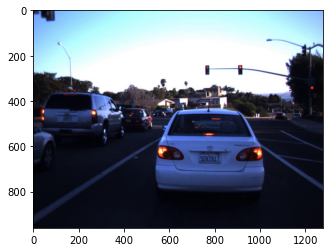

In [3]:
image = cv2.imread("data/dayTrain/dayTrain/dayClip2/frames/dayClip2--00002.jpg")
# load image using cv2....and do processing.
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [4]:
image = cv2.resize(image,(1200,710))     #Downsize the image since the original is quite large
predictions = mymodel2.Predict(image)

In [5]:
print(predictions.shape)

(1, 1, 200, 7)


## Task: The main code

Here is the main code. It turns on our webcam, capture an image upon user request, process that image by calling other user-defined functions, and run the code. 

This code should be activated the last, after running the tabs below it. 

For this part of the code we will not be using the live camera, we will instead be using image files. But the code can be expanded to take video input as well. For the project, we will be using the LISA traffic dataset available here (https://www.kaggle.com/mbornoe/lisa-traffic-light-dataset)

In [8]:
# If you want to run from webcam, you would need to uncomment line 4 and comment line 5
# You would also need to change lines 8 and 9 to read from webcam.
 
# camera = cv2.VideoCapture(0) #create a VideoCapture object with the 'first' camera (your webcam)
frame_num = 0


while(frame_num < 1000):
    frame = cv2.imread("data/dayTrain/dayTrain/dayClip2/frames/dayClip2--"+ str(frame_num).zfill(5) +".jpg")             # Capture frame by frame      
    predictions = mymodel2.Predict(frame)
    
    cv2.imshow('Press Spacebar to Exit',DrawBoundingBoxes(predictions,frame))
    if cv2.waitKey(1) & 0xFF == ord(' '):  # Stop if spacebar is detected
        break
    frame_num +=1

cv2.destroyAllWindows()

## Task: Draw Bounding Box around the vehicle

We create a function to draw a bounding box around the vehicle image that has been detected.


In [6]:
def DrawBoundingBoxes(predictions, image):
    canvas = image.copy()                             # copy instead of modifying the original image
    predictions_1 = predictions[0][0]                 # subset dataframe
    confidence = predictions_1[:,2]                   # getting conf value [image_id, label, conf, x_min, y_min, x_max, y_max]
    topresults = predictions_1[(confidence>0)]     # choosing only predictions with conf value bigger than treshold
    (h,w) = canvas.shape[:2]                        # setting the variable h and w according to image height
    
    #
    for detection in topresults:
        box = detection[3:7] * np.array([w, h, w, h]) # determine box location
        (xmin, ymin, xmax, ymax) = box.astype("int") # assign box location value to xmin, ymin, xmax, ymax

        cv2.rectangle(canvas, (xmin, ymin), (xmax, ymax), (0, 0, 255), 4)  # make a rectangle
        cv2.putText(canvas, str(round(detection[2]*100,1))+"%", (xmin, ymin), # include text
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
        cv2.putText(canvas, str(len(topresults))+" vehicles(s) detected", (50,50), # include text
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
    return canvas

cv2.imshow("image",DrawBoundingBoxes(predictions,image))
cv2.waitKey(0)
cv2.destroyAllWindows()

## Task: Create a threshold.

If there are 1 or more cars in front of the vehicle then print out a statement "Vehicle ahead".

In [7]:
def DrawBoundingBoxes(predictions, image, conf=0.5):
    canvas = image.copy()                             # copy instead of modifying the original image
    predictions = predictions[0][0]
    confidence = predictions[:,2]
    topresults = predictions[(confidence>conf)]
    (h,w) = canvas.shape[:2]
    for detection in topresults:
        box = detection[3:7] * np.array([w, h, w, h])
        (xmin, ymin, xmax, ymax) = box.astype("int")

        cv2.rectangle(canvas, (xmin, ymin), (xmax, ymax), (0, 0, 255), 4)
        cv2.putText(canvas, str(round(detection[2]*100,1))+"%", (xmin, ymin),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
        cv2.putText(canvas,"Vehicle ahead", (50,50),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
    return canvas